Concatenating all data from the three websites into one Pandas dataframe.

In [1]:
import glob
import pandas as pd

SEED = 123

training_files = glob.glob('*_train.csv')

df = pd.concat([pd.read_csv(file) for file in training_files], ignore_index=True)
df

,Packet_Count,Total_Length,Avg_Pkt_Interval,Max_Pkt_Interval,Min_Pkt_Interval,Avg_Pkt_Length,Max_Pkt_Length,Min_Pkt_Length,Most_Common_Pkt_Length,Label
0,74,47555,0.013754,0.307575,2.300000e-08,642.635135,5858,66,66,AniDB
1,50,45640,0.006778,0.121084,1.900000e-08,912.800000,4410,66,66,AniDB
2,27,14405,0.018389,0.160317,3.000000e-08,533.518519,8754,66,66,AniDB
3,46,23243,0.010502,0.105133,1.600000e-08,505.282609,5858,66,66,AniDB
4,31,19169,0.009834,0.148729,2.233000e-06,618.354839,5858,66,66,AniDB
...,...,...,...,...,...,...,...,...,...,...
175,157,923639,0.030442,3.124184,2.000002e-08,5883.050955,18630,66,66,MyAnimeList
176,136,632086,0.019627,1.015524,2.399997e-08,4647.691176,21486,66,66,MyAnimeList
177,177,1187944,0.018276,1.555465,2.900003e-08,6711.548023,21486,66,66,MyAnimeList
178,66,397957,0.041249,2.120124,5.100003e-08,6029.651515,21486,66,78,MyAnimeList


Pre-processing data by giving categorical data (label) numerical values and normalizing numerical data to values between -1 and 1.

In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

encoder = LabelEncoder()
df["Label"] = encoder.fit_transform(df["Label"])
labels = encoder.inverse_transform(range(len(encoder.classes_)))

scaler = StandardScaler()
int_rows = ["Packet_Count", "Total_Length", "Max_Pkt_Length", "Min_Pkt_Length", "Most_Common_Pkt_Length"]
float_rows = ["Avg_Pkt_Interval", "Max_Pkt_Interval", "Min_Pkt_Interval", "Avg_Pkt_Length"]
for row in int_rows:
    df[row] = df[row].astype(int)
    df.loc[:, row] = scaler.fit_transform(df[row].values.reshape(-1, 1))
for row in float_rows:
    df[row] = df[row].astype(float)
    df.loc[:, row] = scaler.fit_transform(df[row].values.reshape(-1, 1))

df

,Packet_Count,Total_Length,Avg_Pkt_Interval,Max_Pkt_Interval,Min_Pkt_Interval,Avg_Pkt_Length,Max_Pkt_Length,Min_Pkt_Length,Most_Common_Pkt_Length,Label
0,-0.420485,-0.518673,-0.263135,-0.417631,-0.248222,-0.791336,-0.664857,0,-0.179520,0
1,-0.493962,-0.519555,-0.370378,-0.500186,-0.248821,-0.698817,-0.801242,0,-0.179520,0
2,-0.564377,-0.533939,-0.191882,-0.482818,-0.247173,-0.828704,-0.392087,0,-0.179520,0
3,-0.506208,-0.529869,-0.313123,-0.507247,-0.249271,-0.838373,-0.664857,0,-0.179520,0
4,-0.552131,-0.531745,-0.323399,-0.487948,0.082955,-0.799651,-0.664857,0,-0.179520,0
...,...,...,...,...,...,...,...,...,...,...
175,-0.166377,-0.115232,-0.006611,0.829205,-0.248671,1.003270,0.538121,0,-0.179520,2
176,-0.230670,-0.249493,-0.172857,-0.104241,-0.248072,0.580215,0.807124,0,-0.179520,2
177,-0.105147,0.006482,-0.193623,0.134776,-0.247323,1.286993,0.807124,0,-0.179520,2
178,-0.444977,-0.357311,0.159512,0.384735,-0.244026,1.053474,0.807124,0,-0.176302,2


Split data into training data and testing data. Testing data takes a random 20% of samples from the training data.

In [3]:
from sklearn.model_selection import train_test_split

X = df.drop("Label", axis=1)
y = df["Label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

Create a random forest, create predictions, and evaluate its accuracy.

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(random_state=SEED)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8888888888888888

Visualize the first few trees.

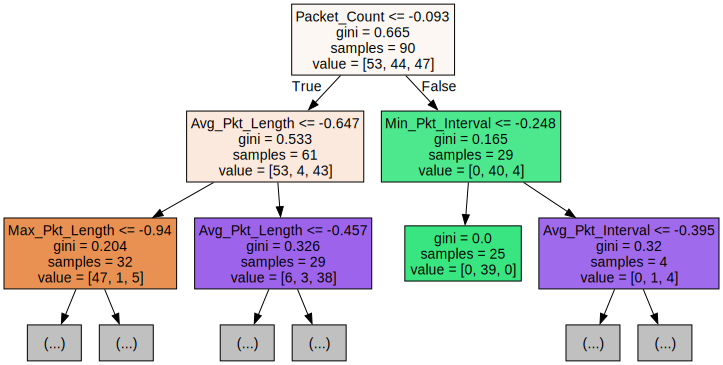

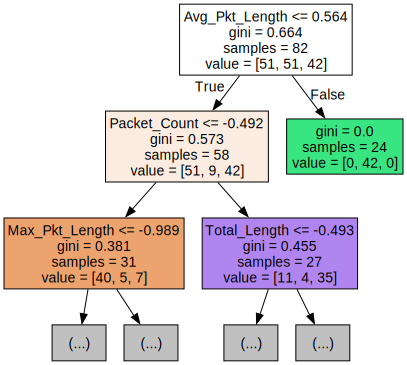

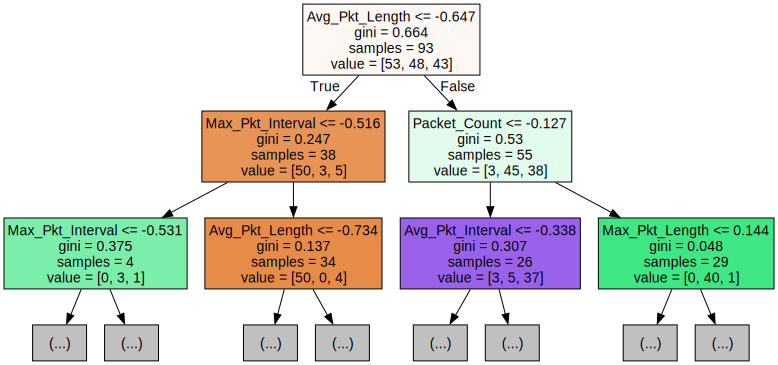

In [5]:
from sklearn.tree import export_graphviz
import graphviz

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(
        tree,
        feature_names=X_train.columns,  
        filled=True,  
        max_depth=2
    )
    graph = graphviz.Source(dot_data)
    display(graph)

Tune hyperparameters.

In [6]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier(random_state=SEED)

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(
    rf,
    param_distributions = param_dist,
    n_iter=5, 
    cv=5,
    random_state=SEED
)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

rand_search.best_params_

{'max_depth': 7, 'n_estimators': 67}

Run predictions on the newly-tuned random forest.

In [7]:
best_rf = rand_search.best_estimator_
y_pred = best_rf.predict(X_test)

Display confusion matrix and calculate accuracy, precision, recall, and F1 scores.

Accuracy: 0.8888888888888888
Precision: 0.8791666666666668
Recall: 0.8958333333333334
F1: 0.8815235690235691



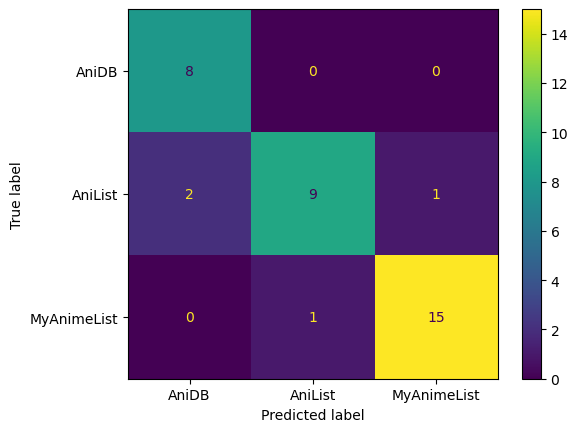

In [8]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels).plot()

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred, average='macro')}")
print(f"Recall: {recall_score(y_test, y_pred, average='macro')}")
print(f"F1: {f1_score(y_test, y_pred, average='macro')}")

print()

Best k-value: 5


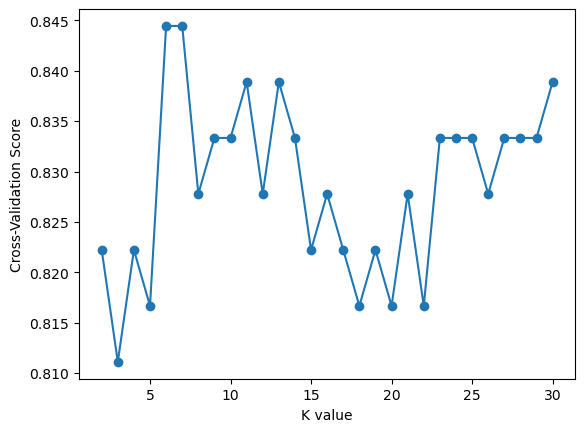

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

k_values = list(range(2, 31))
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))
    
# y_pred = knn.predict(X_test)
# print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
# print(f"Precision: {precision_score(y_test, y_pred, average=None)}")
# print(f"Recall: {recall_score(y_test, y_pred, average=None)}")
# print(f"F1: {f1_score(y_test, y_pred, average=None)}")

plt.plot(k_values, scores, marker="o")
plt.xlabel("K value")
plt.ylabel("Cross-Validation Score")
best_k = scores.index(max(scores)) + 1
print(f"Best k-value: {best_k}")

Accuracy: 0.75
Precision: 0.757094757094757
Recall: 0.75
F1: 0.7306501547987616


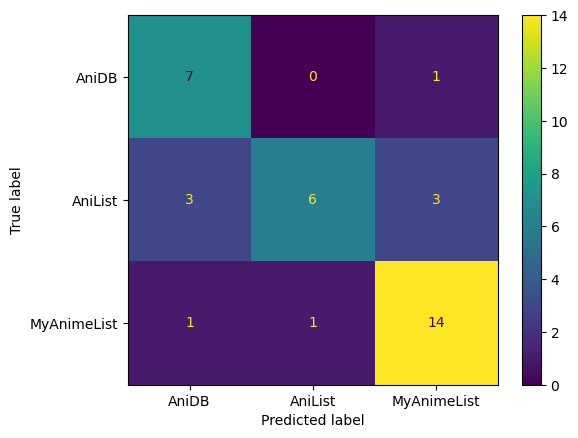

In [10]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels).plot()

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred, average='macro')}")
print(f"Recall: {recall_score(y_test, y_pred, average='macro')}")
print(f"F1: {f1_score(y_test, y_pred, average='macro')}")

Accuracy: 0.7777777777777778
Precision: 0.7801587301587302
Recall: 0.7916666666666666
F1: 0.7727272727272728


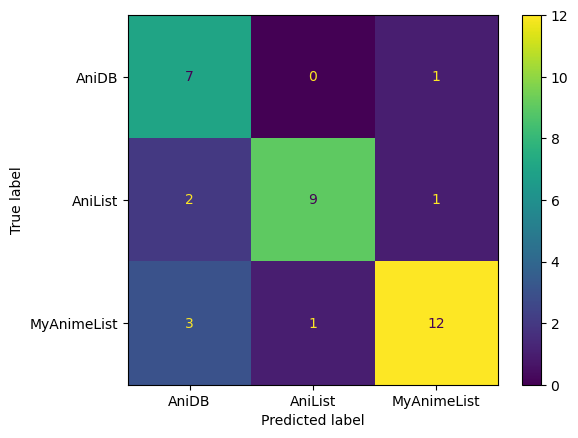

In [11]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=SEED)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels).plot()

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred, average='macro')}")
print(f"Recall: {recall_score(y_test, y_pred, average='macro')}")
print(f"F1: {f1_score(y_test, y_pred, average='macro')}")